<a href="https://colab.research.google.com/github/longhoag/Image-Tagging/blob/main/Image_Tagging_CS4200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import math

In [2]:
# Enable GPU in Google Colab
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Training: ~ 40 mins

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training Data Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Testing Data Shape: (10000, 32, 32, 3)
Testing Labels Shape: (10000, 1)


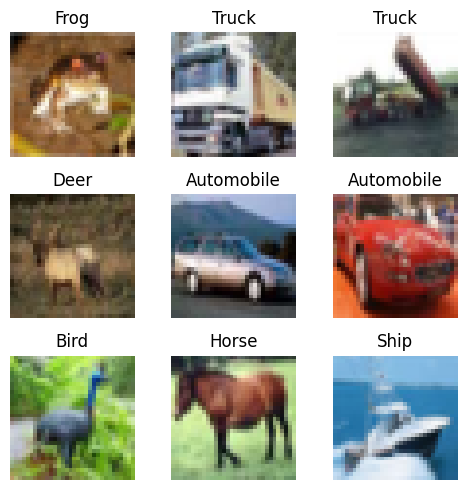

In [3]:
# Load and Prepare the CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Print dataset shapes
print(f"Training Data Shape: {x_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Data Shape: {x_test.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

# Display 9 sample images with labels
plt.figure(figsize=(5, 5))
for i in range(9):  # Show 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])  # Map label to class name
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

## Build Model

In [5]:
# Define Learning Rate Scheduler
def lr_scheduler(epoch):
    initial_lr = 0.001
    if epoch > 40:
        return initial_lr * 0.5e-3
    elif epoch > 30:
        return initial_lr * 1e-3
    elif epoch > 20:
        return initial_lr * 1e-2
    else:
        return initial_lr

lr_callback = LearningRateScheduler(lr_scheduler)

In [6]:
# Build a Deeper CNN Model (ResNet-like)
def build_model():
    weight_decay = 1e-4
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), padding='same',
                            kernel_regularizer=regularizers.l2(weight_decay),
                            input_shape=x_train.shape[1:]))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(64, (3, 3), padding='same',
                            kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), padding='same',
                            kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(128, (3, 3), padding='same',
                            kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(256, (3, 3), padding='same',
                            kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(256, (3, 3), padding='same',
                            kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(10, activation='softmax'))

    return model

model = build_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

## Start Training

In [8]:
# Train the Model
batch_size = 128
epochs = 50

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[lr_callback],
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 117ms/step - accuracy: 0.4495 - loss: 1.5785 - val_accuracy: 0.2823 - val_loss: 2.3356 - learning_rate: 0.0010
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 95ms/step - accuracy: 0.6685 - loss: 1.0216 - val_accuracy: 0.5427 - val_loss: 1.6332 - learning_rate: 0.0010
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.7366 - loss: 0.8489 - val_accuracy: 0.6096 - val_loss: 1.4010 - learning_rate: 0.0010
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.7713 - loss: 0.7579 - val_accuracy: 0.5590 - val_loss: 1.8563 - learning_rate: 0.0010
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.7906 - loss: 0.7085 - val_accuracy: 0.6401 - val_loss: 1.5184 - learning_rate: 0.0010
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.8085 - loss: 0.6672 - val_accuracy: 0.6911 - val_loss: 1.1965 - learning_rate: 0.0010
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.8233 - loss: 0.629

313/313 - 2s - 5ms/step - accuracy: 0.8958 - loss: 0.4794
Test Accuracy: 0.8958


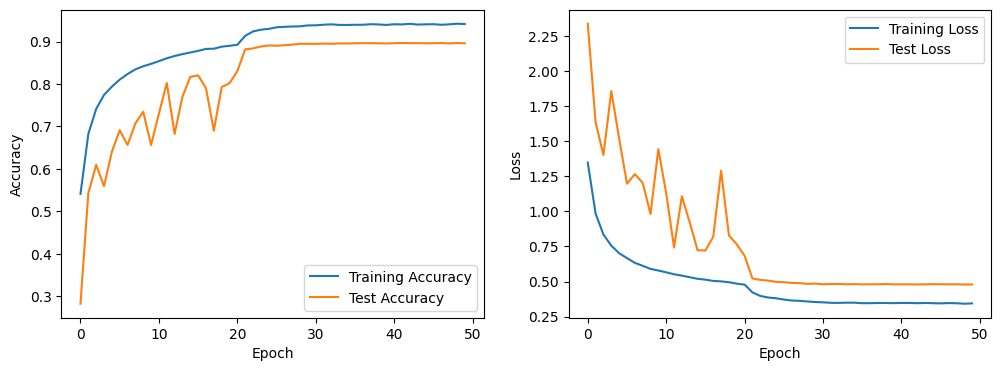

In [9]:
# Evaluate the Model on the Test Set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Visualize Training Results
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# Save the model
model.save('cifar10_cnn_model.h5')
print("Model saved as cifar10_cnn_model.h5")

Model saved as cifar10_cnn_model.h5


## Run Model after Training

In [7]:
# Define class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [5]:
# Load the saved model (optional, for demonstration)
model = tf.keras.models.load_model('cifar10_cnn_model.h5')
print("Model loaded successfully.")

Model loaded successfully.


In [6]:
# Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [8]:
# Test the Model on a New Image
from tensorflow.keras.preprocessing import image
import os

# Function to load and preprocess image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0  # Normalize to [0,1]
    return img_array


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


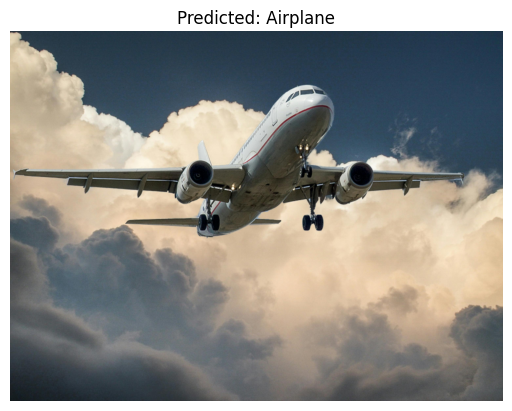

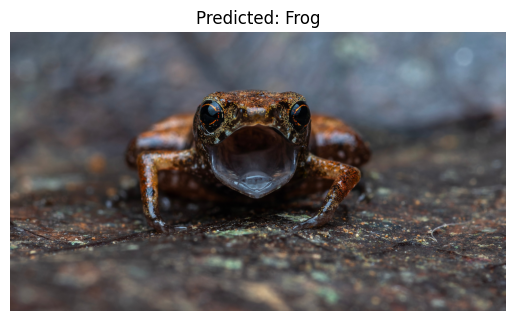

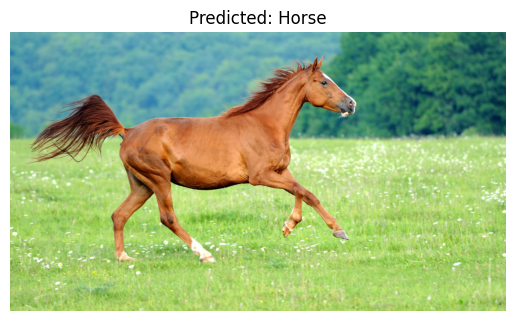

In [10]:
# Array (list) of image file names (replace with your actual image file paths)
image_files = ['image1.jpg', 'image2.jpg', 'image3.jpg']  # Add your image file names here

# Initialize a list to hold preprocessed images
images = []
valid_image_files = []

# Loop over the image files
for img_path in image_files:
    if os.path.exists(img_path):
        img_array = load_and_preprocess_image(img_path)
        images.append(img_array)
        valid_image_files.append(img_path)  # Keep track of valid image files
    else:
        print(f"Image not found at path: {img_path}. Skipping this file.")


if images:
    # Convert list of images to a NumPy array
    images_array = np.array(images)

    # Predict the classes for all images
    predictions = model.predict(images_array)
    predicted_classes = np.argmax(predictions, axis=1)

    # Display the results with images
    for idx, img_path in enumerate(valid_image_files):
        predicted_class = predicted_classes[idx]
        # Load the image in original size for display
        img = image.load_img(img_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[predicted_class]}")
        plt.axis('off')  # Hide axis
        plt.show()
else:
    print("No valid images to predict.")

